# Parameter Optimisation With TA-lib
## Part 1

In [1]:
"""
MSFT works really well after 2013. polarity=1
ORCL works well the whole time. Polarity is (i think) = -1
XOM is not so great.
IBM has a negative IS/OOS correlation
AMZN great performance but not so good IS/OOS corr because it's split into several sections
AAPL pretty good
ABT pretty good
GS not so good
SPY Good
"""

"\nMSFT works really well after 2013. polarity=1\nORCL works well the whole time. Polarity is (i think) = -1\nXOM is not so great.\nIBM has a negative IS/OOS correlation\nAMZN great performance but not so good IS/OOS corr because it's split into several sections\nAAPL pretty good\nABT pretty good\nGS not so good\nSPY Good\n"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import talib
import yfinance as yf
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [3]:
stocks = ['MSFT','AMZN','XOM','ORCL','IBM','AAPL','ABT','GS','SPY','BRK']

In [4]:
data = yf.download(tickers = " ".join(stocks),
        period = "20y",
        #end = "2020-07-05",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = False,
        prepost = False,
        threads = True,
        proxy = None
    )


[*********************100%***********************]  10 of 10 completed


In [5]:
#data['AMZN']['Adj Close']

In [6]:
def backtest(sym,p1,p2,polarity = 1):
    """
    Backtester for MA-crossover
    Inputs:
        sym: stock symbol
        p: parameters
        
    Output:
        unrlzd: unrealizd PnL
    """
    
    d = data[sym]['Adj Close']
    sma1 = talib.SMA(np.asarray(d),min([p1,p2]))
    sma2 = talib.SMA(np.asarray(d),max([p1,p2]))
    sma_diff = sma1-sma2
    
    unrlzd = []
    side = 0
    for i in range(500,len(d)):
        unrlzd.append((d[i]-d[i-1])/d[i-1]*side)
        if np.sign(sma_diff[i])!=np.sign(sma_diff[i-1]):
            side = np.sign(sma_diff[i])*polarity

    return unrlzd

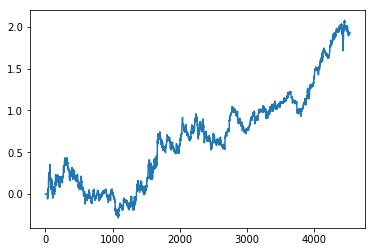

In [7]:
pnl = backtest('ORCL',20,60, polarity=-1)
plt.plot(np.cumsum(pnl))

Text(0,0.5,'Lookback 2')

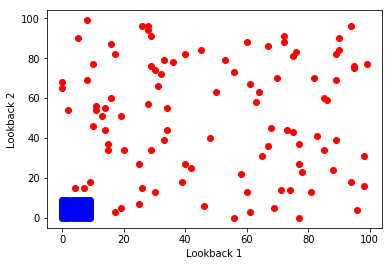

In [8]:
for i in range(10):
    for k in range(10):
        plt.plot(i,k,'bo')
        
plt.plot(np.random.randint(0,100,100),np.random.randint(0,100,100),'ro')
plt.xlabel('Lookback 1')
plt.ylabel('Lookback 2')

In [9]:
def sweep(r,stocks,N=100,res=[],unall=[]):
    """
    Parameters sweep for backtester.
    
    Inputs: 
        r: Nx2 array of parameters
        stocks: list of stock symbols
        N: number of samples
        
    Outputs:
        res: NxM matrix of N simulations with parameters and result
    """
    
    for i in range(N):
        if r[i,0]==r[i,1]: continue
        all_pnls = []
        for stock in stocks:    
            unrlzd = backtest(stock,int(r[i,0]),int(r[i,1]),polarity = -1)
            all_pnls.append(unrlzd)

        portf_ret = np.mean(np.array(all_pnls),axis=0)
        S = np.mean(portf_ret)/np.std(portf_ret)*16

        print(i,r[i,:],S)
        res.append([r[i,0],r[i,1],S])
        unall.append(portf_ret)
        
    return res, unall, portf_ret

In [10]:
stocks[3:4]

['ORCL']

In [11]:
'''Run the parameter sweep'''
r = (np.random.randint(2,500,(1000,2)))
res, rets, portf_ret = sweep(r,stocks[3:4],1000,[],[])

(0, array([402, 428]), -0.19962074857257595)
(1, array([463, 472]), -0.19190651475188641)
(2, array([447,   9]), 0.051099762809549865)
(3, array([  7, 291]), 0.23235036778060608)
(4, array([179, 181]), -0.0035478236986897006)
(5, array([257,  49]), 0.0338842286835865)
(6, array([277, 391]), 0.04843675498920068)
(7, array([256, 489]), -0.05808084482045202)
(8, array([476, 235]), -0.1521097473523596)
(9, array([304, 319]), 0.017591652790483865)
(10, array([143, 255]), 0.04836899072546682)
(11, array([262, 270]), -0.004989297154251086)
(12, array([ 3, 53]), 0.44682417523927326)
(13, array([121,  97]), 0.038433724702922084)
(14, array([142,  99]), 0.2765682590071968)
(15, array([369, 304]), 0.026570462309348668)
(16, array([307, 245]), -0.07698099008659139)
(17, array([97, 75]), 0.30996309918873616)
(18, array([199, 449]), -0.08966070541424609)
(19, array([ 91, 240]), 0.2178255250434621)
(20, array([231, 423]), -0.002948151054499548)
(21, array([187, 290]), -0.07554195845840508)
(22, array

(179, array([392, 244]), 0.03366838023219139)
(180, array([152, 250]), -0.05579555791062102)
(181, array([124,  90]), 0.07314433045698872)
(182, array([448, 339]), -0.03550700472131771)
(183, array([ 88, 410]), -0.08258674691492021)
(184, array([377, 398]), 0.035636939565885956)
(185, array([276, 373]), 0.09537852188261682)
(186, array([344, 480]), -0.09209418466325617)
(187, array([316, 364]), -0.04544669992583521)
(188, array([422, 457]), -0.24877124384324625)
(189, array([256, 187]), -0.07570515626890945)
(190, array([128, 234]), 0.09256329596599118)
(191, array([ 38, 299]), 0.1275432858161453)
(192, array([215, 478]), -0.08689341770912846)
(193, array([440, 143]), -0.0734063197146937)
(194, array([388, 298]), 0.07368328330479136)
(195, array([319, 476]), -0.27305164126583426)
(196, array([129, 175]), 0.22352192969455825)
(197, array([182, 474]), -0.22624502617414757)
(198, array([448, 273]), -0.01993038999744976)
(199, array([ 10, 274]), 0.15278224645751937)
(200, array([315, 467])

(356, array([447, 192]), -0.1185595101052556)
(357, array([210, 336]), -0.03011283508318748)
(358, array([464,  65]), -0.16717401755214542)
(359, array([167,  81]), 0.29821343144101436)
(360, array([ 62, 208]), 0.15499286698887874)
(361, array([324, 332]), -0.10791529184169354)
(362, array([193, 276]), -0.08130973278672048)
(363, array([325, 216]), -0.039419586886988336)
(364, array([  6, 205]), 0.32208955347521956)
(365, array([405,  65]), -0.019730301254971844)
(366, array([311,  57]), 0.16835275337107078)
(367, array([341,  40]), 0.09069361385853852)
(368, array([217, 272]), 0.02450855963093158)
(369, array([402, 316]), -0.052761285312075135)
(370, array([  2, 317]), 0.46373575473940803)
(371, array([146, 141]), 0.1324068104881704)
(372, array([174, 177]), 0.040474682629112683)
(373, array([ 25, 323]), 0.04393150456621576)
(374, array([ 77, 105]), 0.3292560084309224)
(375, array([ 21, 382]), 0.17926307160531516)
(376, array([443, 124]), -0.11439403353051616)
(377, array([444, 316]),

(532, array([403, 348]), 0.013002971097113953)
(533, array([144, 169]), 0.33235224189635654)
(534, array([335, 235]), -0.07274638571492859)
(535, array([272, 453]), -0.014255540901883686)
(536, array([272, 128]), 0.03767271553713239)
(537, array([  5, 268]), 0.1563528620767297)
(538, array([84, 40]), 0.4166258373469307)
(539, array([334, 491]), -0.1497043995038452)
(540, array([109, 194]), 0.28986940996136473)
(541, array([ 47, 415]), 0.08521176036941372)
(542, array([162, 203]), -0.08477691786227981)
(543, array([388, 210]), -0.1729778012621369)
(544, array([438,  34]), 0.08297632036106566)
(545, array([ 19, 310]), 0.15247847419415547)
(546, array([293, 431]), 0.017514664093006914)
(547, array([306, 458]), -0.06881480500977154)
(548, array([395, 453]), -0.19941963977361024)
(549, array([439,  45]), 0.03653203651267472)
(550, array([210, 405]), -0.11867390725810278)
(551, array([477, 252]), -0.05116453938910363)
(552, array([328, 126]), -0.06483992285633727)
(553, array([ 68, 445]), -0

(709, array([241, 367]), -0.014242735832986908)
(710, array([248, 487]), -0.07875508174649608)
(711, array([ 55, 191]), 0.2670542048731127)
(712, array([318,  90]), -0.0609775291174238)
(713, array([  7, 483]), 0.227815282608245)
(714, array([315, 304]), 0.03876490373363863)
(715, array([344, 437]), -0.07718709286410369)
(716, array([225, 494]), -0.09882737907151908)
(717, array([286, 122]), -0.017490158064679892)
(718, array([462, 244]), -0.06518140738515979)
(719, array([189, 390]), -0.11192315087987571)
(720, array([ 66, 144]), 0.31053046715652405)
(721, array([287, 269]), 0.02404183375335827)
(722, array([499, 451]), -0.1405570181512885)
(723, array([392, 257]), 0.05845266810448924)
(724, array([112, 185]), 0.2594158023554703)
(725, array([224, 421]), 0.0067490141181868624)
(726, array([427,  43]), 0.00026343649006534326)
(727, array([312, 146]), -0.05091969158535375)
(728, array([449, 253]), 0.02416558803875087)
(729, array([497, 256]), -0.06948249094973848)
(730, array([267,  29]

(886, array([243, 226]), -0.005253945073959697)
(887, array([370, 229]), -0.02347126685322554)
(888, array([488, 439]), -0.2835729023016166)
(889, array([370, 232]), -0.040374616383315576)
(890, array([ 53, 358]), -0.0019614909488648944)
(891, array([476, 133]), -0.13156102505320733)
(892, array([114, 131]), 0.1799080212282417)
(893, array([446, 409]), -0.04530294442781457)
(894, array([215, 194]), -0.05824739067779111)
(895, array([147, 135]), 0.19090245089873428)
(896, array([138, 179]), 0.3296847275161294)
(897, array([219,  61]), 0.14163169314213986)
(898, array([80, 41]), 0.4330860065811374)
(899, array([109,  20]), 0.38535002570650073)
(900, array([ 11, 296]), 0.2165178398316425)
(901, array([ 28, 343]), 0.16599936365515214)
(902, array([181, 124]), 0.20816887769925893)
(903, array([ 27, 431]), -0.0014105719839346245)
(904, array([317, 338]), -0.06888275770913879)
(905, array([ 83, 491]), -0.12705099911752327)
(906, array([231,  36]), 0.2251395605674002)
(907, array([331, 367]), 

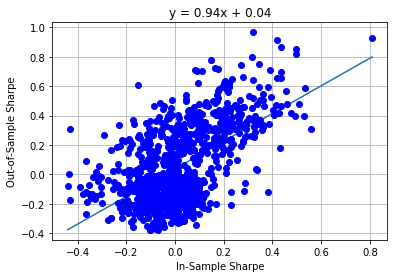

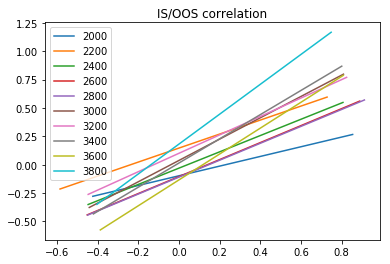

In [12]:
def linreg(x,y):
    m =  np.polyfit(x,y,1)
    xx = np.linspace(min(x),max(x),100)
    yy = np.polyval(m,xx)
    return xx,yy,m

def oos_testing(rets,cutoff,metric,plot_points=True):
    M_is = []; M_os = []
    for ret in rets:
        M_is.append(metric(ret,0,cutoff))
        M_os.append(metric(ret,cutoff,-1))
    #
        
    xx,yy,m = linreg(M_is,M_os)
    plt.plot(xx,yy,label=cutoff)
    if plot_points:
        plt.plot(M_is,M_os,'bo')
        plt.xlabel('In-Sample Sharpe')
        plt.ylabel('Out-of-Sample Sharpe')
        plt.title('y = %.2fx + %.2f'%(m[0],m[1]))
        plt.grid()
        
Sharpe = lambda ret,c1,c2: np.mean(ret[c1:c2])/np.std(portf_ret[c1:c2])*16
oos_testing(rets,3000,Sharpe)
plt.show()

for coff in range(2000,4000,200):
    oos_testing(rets,coff,Sharpe,plot_points=False)
    
plt.title('IS/OOS correlation')
plt.legend()
plt.show()
# good: XOM, ORCL
# bad: MSFT, AMZN, IBM

## Part 2
### Plotting the response surface

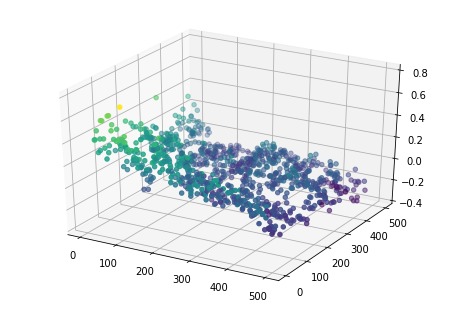

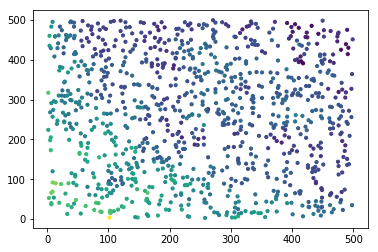

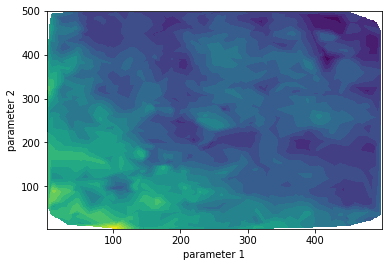

In [13]:
def plotter(res):
    '''
    Plots the results of the parameter sweep
    in 3D, scatter and contour plots.
    inputs:
        res: NxM results matrix
    '''
    
    x = np.array(res)[:,0]
    y = np.array(res)[:,1]
    z = np.array(res)[:,2]
    
    fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=z)
    plt.show()

    plt.scatter(x, y, c=z, s=10)
    plt.show()
    
    N = 300
    xi,yi = np.meshgrid(np.linspace(min(x),max(x),N),np.linspace(min(y),max(y),N))
    zi = griddata((x,y),z,(xi,yi),method='linear')
    plt.contourf(xi,yi,zi,20)
    plt.xlabel('parameter 1')
    plt.ylabel('parameter 2')
    
    return x,y,z
    
x,y,z = plotter(res)

### Finding the best parameter sets

In [14]:
import copy

In [15]:
def find_best_corr(x,y,z,rets,N_best,N_samples,cutoff):
    idx = np.argsort(z)[-N_best:]
    mat = np.corrcoef(np.array(rets)[idx,:cutoff])
    mat_sq = mat**2
    new_mat = copy.copy(mat_sq)
    new_idx = idx
    while new_mat.shape[0]>N_samples:
        col_sums = np.sum(new_mat,axis=0)
        to_del = np.argsort(col_sums)[-1]
        new_mat = np.delete(new_mat,to_del,0)
        new_mat = np.delete(new_mat,to_del,1)
        new_idx = np.delete(new_idx,to_del,0)
    return new_mat,new_idx,x[new_idx],y[new_idx]
    
cutoff = -2800
new_mat, new_idx, xnew, ynew = find_best_corr(x,y,z,rets,40,5,cutoff)

/Users/Qian/anaconda3/envs/lowerPython/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


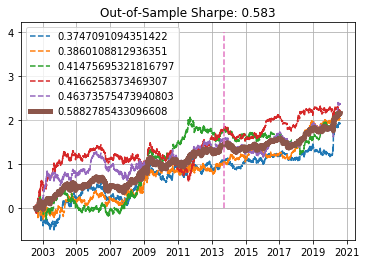

In [16]:
for i in new_idx:
    S = np.mean(rets[i])/np.std(rets[i])*16
    plt.plot(data.index[-len(rets[i]):],np.cumsum(rets[i]),'--',label=S)
       
portf = np.mean(np.array(rets)[new_idx],axis=0)
S_port = np.mean(portf)/np.std(portf)*16
S_oos = np.mean(portf[-cutoff:])/np.std(portf[-cutoff:])*16
combined = np.cumsum(np.mean(np.array(rets)[new_idx],axis=0))
plt.plot(data.index[-len(combined):],combined,lw=5,label=S_port)
plt.plot([data.index[-len(combined):][-cutoff]]*2,[0,4],'--')
plt.legend()
plt.title("Out-of-Sample Sharpe: %.3f"%S_oos)
plt.grid()